<a href="https://colab.research.google.com/github/ReginaldoB/dio-lab-open-source/blob/main/Calculo_da_fun%C3%A7%C3%A3o_f(x)_%3D_2X%5E5_%E2%80%93_3X%5E3_X%5E2%2C_que_ser%C3%A1_minimizada_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
Objetivo: Calcular a função f(x) = 2X^5 – 3X^3 * X^2, que será minimizada.


Geração 1:
  Indivíduo         Binário    x(real)        f(x)
-----------  --------------  ---------  ----------
          1  00100100100010      1.428      -5.937
          2  11100001000010      8.791  -52502.1
          3  10100011010110      6.381  -10582
          4  01101001100110      4.126   -1195.18
          5  10001001111100      5.389   -4544.96
          6  11110011101010      9.518  -78132.5
          7  11001100111001      8.004  -32854.7
          8  01111110011001      4.938   -2935.82
          9  11101110100011      9.319  -70277.7
         10  10010001000100      5.667   -5846.21

Geração 2:
  Indivíduo         Binário    x(real)        f(x)
-----------  --------------  ---------  ----------
          1  00100111100010      1.545      -8.807
          2  00100000110010      1.281      -3.456
          3  00100101110011      1.477      -7.038
          4  00101010110010      1.672     -13.07
          5  00110110000010      2.112     -41.973
          6  00101100101

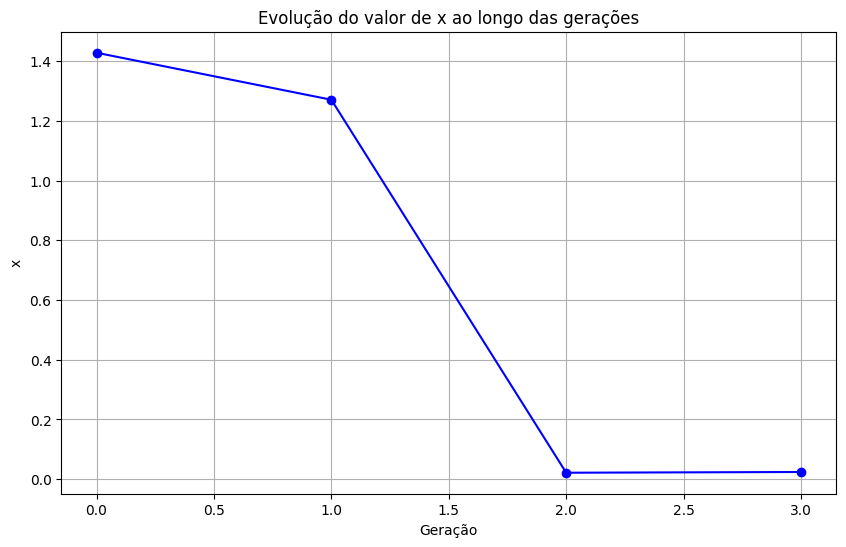

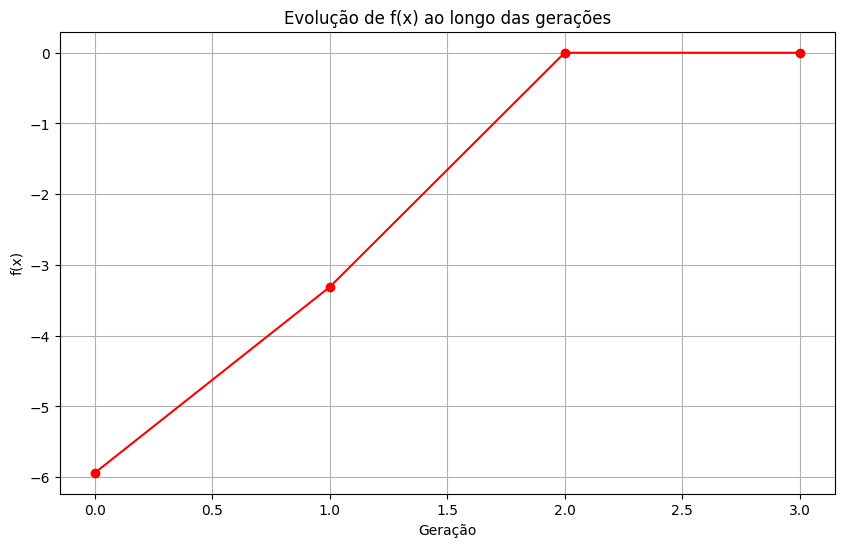

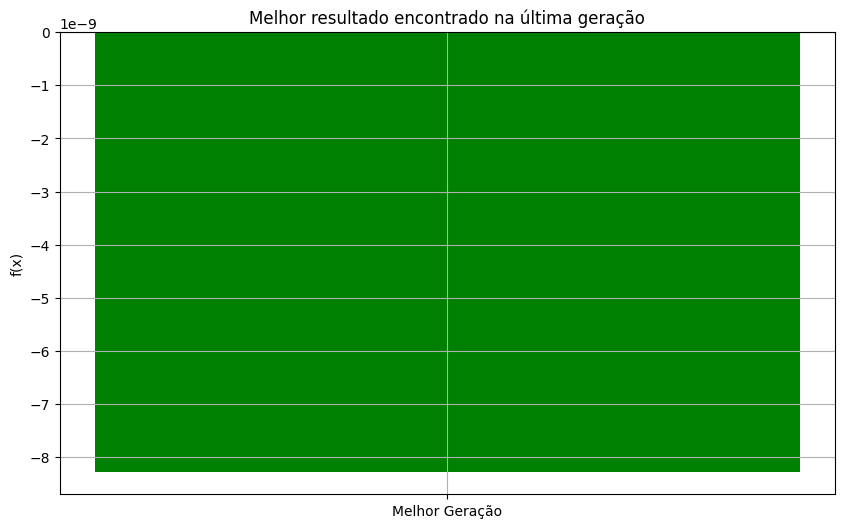

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

# Definir função objetivo
def objective_function(x):
    return 2 * x**5 - 3 * (x**3) * (x**2)

# Parâmetros do algoritmo genético
pop_size = 10  # Tamanho da população
mutation_rate = 0.2  # Taxa de mutação
cross_over_rate = 0.8  # Taxa de cruzamento
num_generations = 4  # Número de gerações
x_lower_bound = 0.001  # Limite inferior para x
x_upper_bound = 10.000  # Limite superior para x
precision = 3  # Precisão decimal
bit_parts = [5, 5, 4]  # 3 partes: 5 bits, 5 bits e 4 bits
total_bits = sum(bit_parts)  # Total de bits por indivíduo

# Função para converter valor decimal para binário
def decimal_to_binary(x, k):
    return np.binary_repr(int((x - x_lower_bound) * ((2**k - 1) / (x_upper_bound - x_lower_bound))), k)

# Função para converter binário de volta para valor decimal
def binary_to_decimal(b, k):
    return x_lower_bound + (int(b, 2) / (2**k - 1)) * (x_upper_bound - x_lower_bound)

# Função para gerar a população inicial
def generate_population(pop_size, total_bits):
    return [np.random.choice(['0', '1'], size=total_bits).tolist() for _ in range(pop_size)]

# Função para cruzamento
def crossover(parent1, parent2, bit_parts):
    split_points = np.cumsum(bit_parts)[:-1]
    cross_point = np.random.randint(1, len(parent1))
    child1 = parent1[:cross_point] + parent2[cross_point:]
    child2 = parent2[:cross_point] + parent1[cross_point:]
    return child1, child2

# Função para mutação
def mutate(individual, mutation_rate):
    individual = list(individual)
    for i in range(len(individual)):
        if np.random.rand() < mutation_rate:
            individual[i] = '1' if individual[i] == '0' else '0'
    return ''.join(individual)

# Função para selecionar os pais
def select_parents(population, fitness_scores):
    idx = np.random.choice(len(population), size=2, p=fitness_scores/fitness_scores.sum())
    return population[idx[0]], population[idx[1]]

# Função para combinar as partes e calcular o valor decimal de x
def combine_parts_to_decimal(individual, bit_parts):
    parts = []
    start = 0
    for bits in bit_parts:
        parts.append("".join(individual[start:start + bits]))
        start += bits
    combined_binary = "".join(parts)
    return binary_to_decimal(combined_binary, total_bits)

# O código vai imprimir as tabelas das gerações e destacará em vermelho o melhor valor de x(real) e f(x) em cada geração.
def highlight_best(value, is_best):
    if is_best:
        return f"\033[91m{value:.3f}\033[0m"  # Vermelho
    return f"{value:.3f}"

# Algoritmo genético
population = generate_population(pop_size, total_bits)
best_solutions = []

for gen in range(num_generations):
    # Avaliação
    fitness_scores = np.array([1 / (1 + abs(objective_function(combine_parts_to_decimal(ind, bit_parts)))) for ind in population])

    # Coletar melhor resultado para a geração
    best_idx = np.argmax(fitness_scores)
    best_x = combine_parts_to_decimal(population[best_idx], bit_parts)
    best_fx = objective_function(best_x)
    best_solutions.append((gen, best_x, best_fx))

    # Tabela de resultados da geração
    table_data = []
    for i, individual in enumerate(population):
        x_real = combine_parts_to_decimal(individual, bit_parts)
        f_x = objective_function(x_real)
        is_best = (i == best_idx)
        table_data.append([
            i + 1,
            "".join(individual),
            highlight_best(x_real, is_best),
            highlight_best(f_x, is_best)
        ])

    print(f"\nGeração {gen + 1}:")
    print(tabulate(table_data, headers=["Indivíduo", "Binário", "x(real)", "f(x)"]))

    # Seleção, cruzamento e mutação
    new_population = []
    while len(new_population) < pop_size:
        parent1, parent2 = select_parents(population, fitness_scores)
        if np.random.rand() < cross_over_rate:
            child1, child2 = crossover(parent1, parent2, bit_parts)
        else:
            child1, child2 = parent1, parent2
        new_population.append(mutate(child1, mutation_rate))
        new_population.append(mutate(child2, mutation_rate))
    population = new_population[:pop_size]

# Gerar gráficos
generations, x_values, f_values = zip(*best_solutions)

# Gráfico da evolução dos valores de x ao longo das gerações
plt.figure(figsize=(10, 6))
plt.plot(generations, x_values, marker='o', color='b')
plt.title('Evolução do valor de x ao longo das gerações')
plt.xlabel('Geração')
plt.ylabel('x')
plt.grid(True)
plt.show()

# Gráfico da evolução dos valores de f(x) ao longo das gerações
plt.figure(figsize=(10, 6))
plt.plot(generations, f_values, marker='o', color='r')
plt.title('Evolução de f(x) ao longo das gerações')
plt.xlabel('Geração')
plt.ylabel('f(x)')
plt.grid(True)
plt.show()

# Gráfico comparativo do melhor resultado final
best_gen, best_x, best_fx = best_solutions[-1]
plt.figure(figsize=(10, 6))
plt.bar(['Melhor Geração'], [best_fx], color='g')
plt.title('Melhor resultado encontrado na última geração')
plt.ylabel('f(x)')
plt.grid(True)
plt.show()